In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')

In [2]:
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

In [4]:
df = pd.read_csv(r"C:\Users\avira\Zomato Data Analysis\zomato.csv", encoding='latin-1')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Data Storage:  
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:  

• Restaurant Id: Unique id of every restaurant across various cities of the world  
• Restaurant Name: Name of the restaurant  
• Country Code: Country in which restaurant is located  
• City: City in which restaurant is located  
• Address: Address of the restaurant  
• Locality: Location in the city  
• Locality Verbose: Detailed description of the locality  
• Longitude: Longitude coordinate of the restaurant's location  
• Latitude: Latitude coordinate of the restaurant's location  
• Cuisines: Cuisines offered by the restaurant  
• Average Cost for two: Cost for two people in different currencies   
• Currency: Currency of the country  
• Has Table booking: yes/no  
• Has Online delivery: yes/ no  
• Is delivering: yes/ no  
• Switch to order menu: yes/no  
• Price range: range of price of food  
• Aggregate Rating: Average rating out of 5  
• Rating color: depending upon the average rating color  
• Rating text: text on the basis of rating of rating  
• Votes: Number of ratings casted by people  

In [5]:
for columns in df.columns:
    printmd(columns)

Restaurant ID

Restaurant Name

Country Code

City

Address

Locality

Locality Verbose

Longitude

Latitude

Cuisines

Average Cost for two

Currency

Has Table booking

Has Online delivery

Is delivering now

Switch to order menu

Price range

Aggregate rating

Rating color

Rating text

Votes

In [6]:
print("Shape of the dataset {}".format(df.shape))

Shape of the dataset (9551, 21)


In [7]:
df.describe().iloc[:,4:8]

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


# Exploratory Data Analysis

Our dataset has 21 columns and 9551 rows

In [8]:
# dataset of India
zomato_india = df[df['Country Code'] == 1]
zomato_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [9]:
zomato_india['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Amritsar          21
Bhubaneshwar      21
Ahmedabad         21
Lucknow           21
Guwahati          21
Jaipur            20
Dehradun          20
Indore            20
Kochi             20
Coimbatore        20
Bhopal            20
Ludhiana          20
Surat             20
Kolkata           20
Agra              20
Kanpur            20
Vadodara          20
Nashik            20
Vizag             20
Pune              20
Chennai           20
Mangalore         20
Mumbai            20
Mysore            20
Allahabad         20
Goa               20
Nagpur            20
Puducherry        20
Aurangabad        20
Ranchi            20
Patna             20
Bangalore         20
Varanasi          20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

In [10]:
zomato_ncr = zomato_india[(zomato_india['City'] == 'New Delhi') | (zomato_india['City'] == 'Gurgaon') | (zomato_india['City'] == 'Faridabad') | (zomato_india['City'] == 'Noida')]
zomato_ncr.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8
868,301729,Raju Dhaba,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,8
869,301731,Rakheja Bakery,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,7


In [11]:
zomato_ncr.drop(['Country Code','Currency'], axis = 1, inplace = True)  # dropping unnecessary columns what are not needed

In [12]:
zomato_ncr.shape # now our data has 19 columns

(7922, 19)

In [13]:
zomato_ncr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7922 entries, 865 to 9112
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7922 non-null   int64  
 1   Restaurant Name       7922 non-null   object 
 2   City                  7922 non-null   object 
 3   Address               7922 non-null   object 
 4   Locality              7922 non-null   object 
 5   Locality Verbose      7922 non-null   object 
 6   Longitude             7922 non-null   float64
 7   Latitude              7922 non-null   float64
 8   Cuisines              7922 non-null   object 
 9   Average Cost for two  7922 non-null   int64  
 10  Has Table booking     7922 non-null   object 
 11  Has Online delivery   7922 non-null   object 
 12  Is delivering now     7922 non-null   object 
 13  Switch to order menu  7922 non-null   object 
 14  Price range           7922 non-null   int64  
 15  Aggregate rating   

In [14]:
zomato_ncr.describe()

,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,7.922000e+03,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000
mean,8.985842e+06,73.330433,27.154337,600.310528,1.646680,2.395834,106.093663
std,9.088104e+06,16.851593,6.230072,599.587540,0.815057,1.509781,323.243295
min,5.300000e+01,0.000000,0.000000,50.000000,1.000000,0.000000,0.000000
25%,3.005658e+05,77.106406,28.525679,300.000000,1.000000,0.000000,3.000000
50%,3.129355e+05,77.204162,28.574309,450.000000,1.000000,3.000000,19.000000
75%,1.836801e+07,77.278420,28.640005,650.000000,2.000000,3.500000,78.000000
max,1.850065e+07,77.529671,35.000000,8000.000000,4.000000,4.900000,7931.000000


In [15]:
# Checking for Null values
zomato_ncr.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<AxesSubplot:>

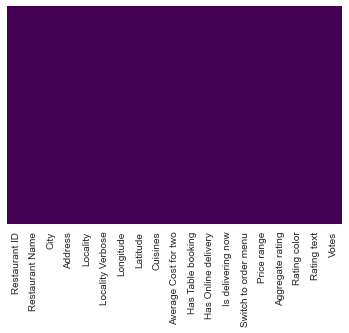

In [16]:
# Visual Description of null values 
sns.heatmap(zomato_ncr.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
# No null values in the dataset

# Data Visualisation for NCR data

In [17]:
zomato_ncr.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,No,No,No,No,1,2.9,Orange,Average,4
866,5992,Knight Rock,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,No,No,No,No,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,No,No,No,No,1,2.8,Orange,Average,8
868,301729,Raju Dhaba,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,150,No,No,No,No,1,2.9,Orange,Average,8
869,301731,Rakheja Bakery,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,100,No,No,No,No,1,2.8,Orange,Average,7


In [18]:
zomato_ncr['Rating color'].value_counts()

Orange        3571
White         2137
Yellow        1580
Green          413
Red            178
Dark Green      43
Name: Rating color, dtype: int64

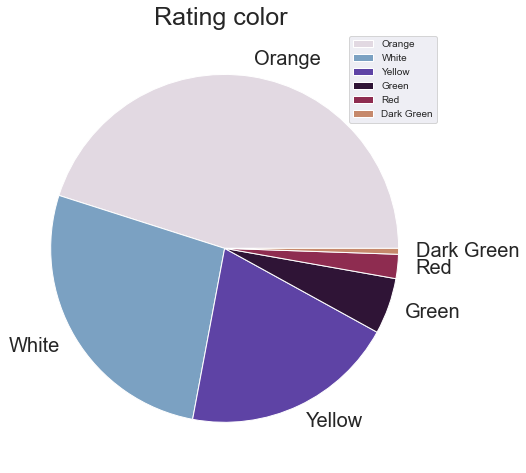

In [19]:
color = plt.cm.twilight(np.linspace(0,1,7))
plt.figure(figsize = (12,8))
zomato_ncr['Rating color'].value_counts().sort_values(ascending=False).plot.pie(colors = color, fontsize = 20)
plt.title("Rating color ",fontsize = 25)
plt.axis('off')
plt.legend()
plt.show()

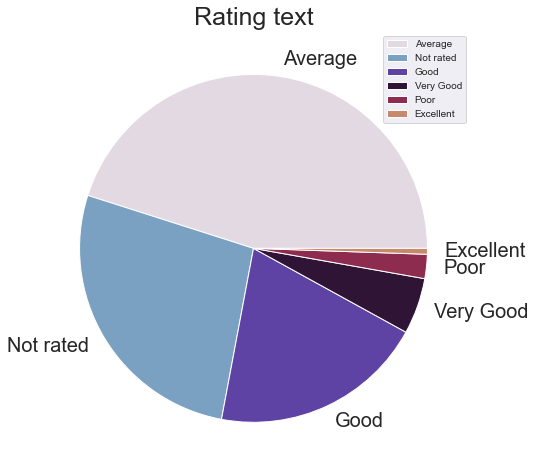

In [20]:
color = plt.cm.twilight(np.linspace(0,1,7))
plt.figure(figsize = (12,8))
zomato_ncr['Rating text'].value_counts().sort_values(ascending=False).plot.pie(colors = color, fontsize = 20)
plt.title("Rating text",fontsize = 25)
plt.axis('off')
plt.legend()
plt.show()

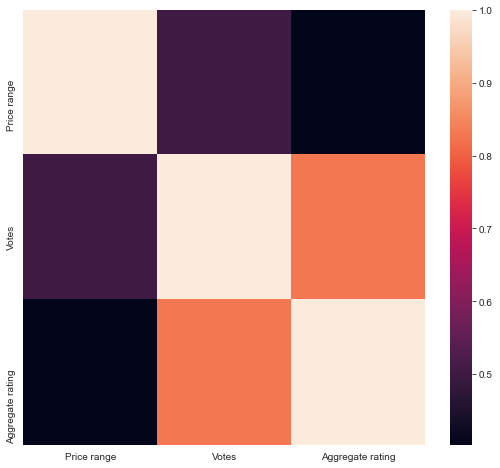

In [21]:
[plt.figure(figsize=(9,8))]
num_data = ['Price range', 'Votes', 'Aggregate rating']
sns.heatmap(zomato_ncr[num_data].corr(method='spearman'));

In [22]:
fig = px.box(zomato_ncr.groupby('Cuisines')['Aggregate rating'].mean(), y="Aggregate rating", points = 'all')
fig.show()

In [23]:
fig = px.box(zomato_ncr, x='Has Table booking',y="Aggregate rating", points = 'all')
fig.show()

In [24]:
fig = px.scatter(zomato_ncr, x="Average Cost for two", y='Aggregate rating', title ='Average cost of 2 vs Aggregate Rating')
fig.show()

In [25]:
# Encode the boolean values
boolean_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

# Create encoding
encoding = {"Yes" : 1,
            "No" : 0}

# encoding using the lambda function
for col in boolean_columns:
    zomato_ncr[col] = zomato_ncr[col].apply(lambda x : encoding[x])

In [26]:
zomato_ncr[boolean_columns]

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu
865,0,0,0,0
866,0,0,0,0
867,0,0,0,0
868,0,0,0,0
869,0,0,0,0
...,...,...,...,...
9108,0,1,0,0
9109,0,0,0,0
9110,0,0,0,0
9111,0,0,0,0


In [27]:
pd.set_option('display.max_rows', None)
#zomato_ncr['Restaurant Name'].value_counts()

In [28]:
# check restaurants having more than 7 outlets
more_than_7 = {}
for restaurants,val in zip(zomato_ncr['Restaurant Name'].value_counts().index, zomato_ncr['Restaurant Name'].value_counts()):
    if val >= 7:
        more_than_7[restaurants] = val
print("Reataurants with more than 7 outlets in ncr: {}".format(len(more_than_7.keys())))

Reataurants with more than 7 outlets in ncr: 63


In [29]:
pd.set_option('display.max_rows', None)
zomato_ncr.head(3)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,0,0,0,0,1,2.9,Orange,Average,4
866,5992,Knight Rock,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,0,0,0,0,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,0,0,0,0,1,2.8,Orange,Average,8


<Figure size 432x288 with 0 Axes>

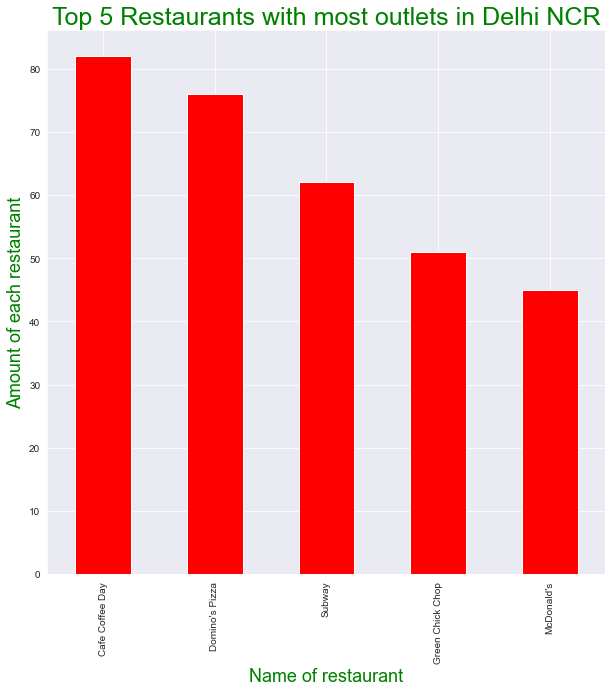

<Figure size 432x288 with 0 Axes>

In [56]:
# Visualisation of top 5 restaurants in ncr
zomato_ncr['Restaurant Name'].value_counts().head(5).plot(kind='bar', color='red', figsize=(10,10))
plt.xlabel('Name of restaurant', color='g', fontsize = 18)
plt.ylabel('Amount of each restaurant', color='g', fontsize = 18)
plt.title('Top 5 Restaurants with most outlets in Delhi NCR', color = 'g', fontsize = 25)
plt.figure()

<Figure size 432x288 with 0 Axes>

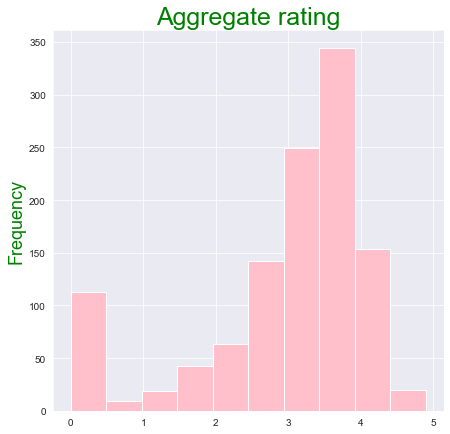

<Figure size 432x288 with 0 Axes>

In [62]:
zomato_ncr.groupby('Cuisines')['Aggregate rating'].mean().plot.hist(orientation='vertical', color='pink', figsize=(7,7))
plt.ylabel('Frequency', color='g', fontsize = 18)
plt.title('Aggregate rating', color = 'g', fontsize = 25)
plt.figure()

C:\Users\avira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



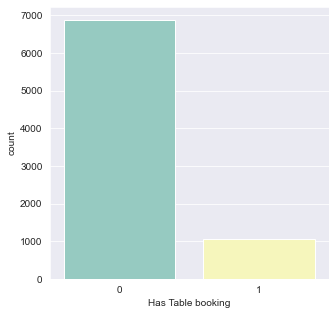

In [32]:
# 1 show yes for booking while 0 show no
plt.figure(figsize = (5,5))
sns.countplot(zomato_ncr['Has Table booking'], palette="Set3")
plt.show()

C:\Users\avira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



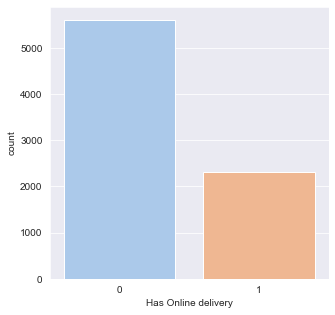

In [33]:
# 1 show yes for booking while 0 show no
plt.figure(figsize = (5,5))
sns.countplot(zomato_ncr['Has Online delivery'], palette="pastel")
plt.show()

# Restaurants with more than 7 outlets

C:\Users\avira\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 140 missing from current font.

C:\Users\avira\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 140 missing from current font.



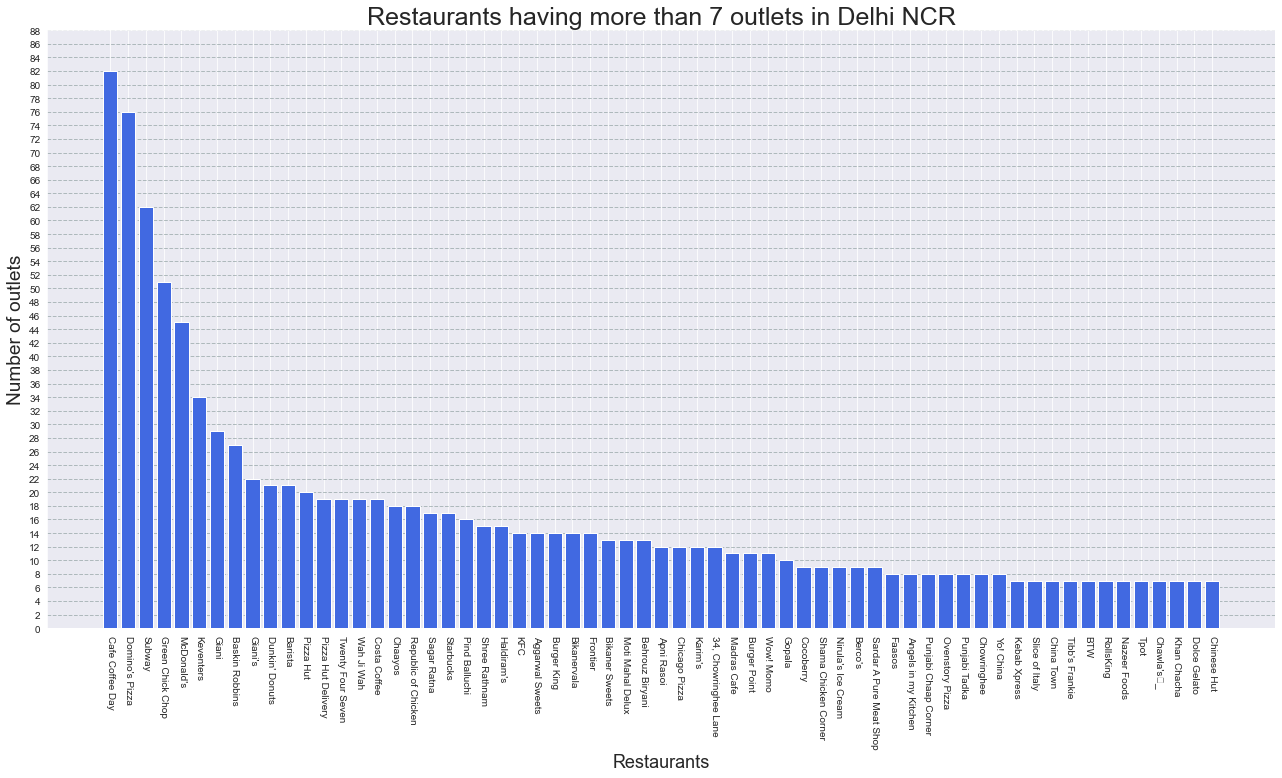

In [34]:
plt.figure(figsize = (22, 11))
plt.bar(x = more_than_7.keys(), height = more_than_7.values(), color='royalblue')
plt.xlabel('Restaurants', fontsize = 18)
plt.ylabel('Number of outlets', fontsize = 19)
plt.title('Restaurants having more than 7 outlets in Delhi NCR', fontsize = 25)
plt.xticks(rotation = -90)
plt.yticks(np.arange(0,90,2))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

In [35]:
def seven_or_more(data, column):
    for col in column:

        d = zomato_ncr[zomato_ncr['Restaurant Name'] == col]
        data = pd.concat((data,d), axis = 0)
  
    return data

In [36]:
seven_or_more_outlets = pd.DataFrame(None)
seven_or_more_outlets = seven_or_more(seven_or_more_outlets, list(more_than_7.keys()))
seven_or_more_outlets.shape

(1067, 19)

C:\Users\avira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



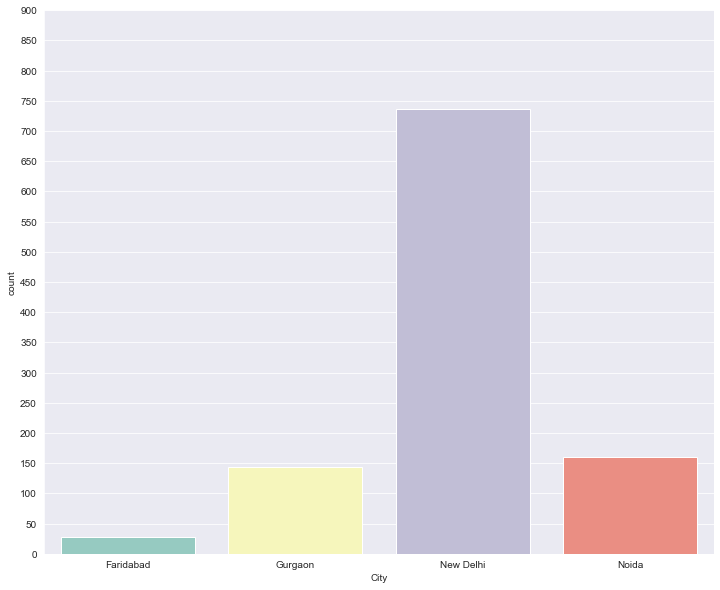

In [37]:
plt.figure(figsize = (12,10))
sns.countplot(seven_or_more_outlets['City'], palette="Set3")
plt.yticks(np.arange(0,950,50))
plt.show()

# New Delhi Data

In [38]:
# analysis on new delhi data
delhi_data = seven_or_more_outlets.groupby('City').get_group('New Delhi')
delhi_data.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2592,7582,Cafe Coffee Day,New Delhi,"Nilgiri Market, Opposite Nilgiri Appartments, ...",Alaknanda,"Alaknanda, New Delhi",77.250146,28.528133,Cafe,450,0,0,0,0,1,3.2,Orange,Average,23
2754,18163907,Cafe Coffee Day,New Delhi,"Shop D, Ground Floor, DCM Building, Barakhamba...",Barakhamba Road,"Barakhamba Road, New Delhi",77.225462,28.629818,Cafe,450,0,0,0,0,1,2.9,Orange,Average,4
2768,7354,Cafe Coffee Day,New Delhi,"14-A, Basant Lok Market, Vasant Vihar, New Delhi","Basant Lok Market, Vasant Vihar","Basant Lok Market, Vasant Vihar, New Delhi",77.164108,28.558603,Cafe,450,0,0,0,0,1,3.2,Orange,Average,49
2802,18312487,Cafe Coffee Day,New Delhi,"1st Floor, BPCL Petrol Pump, Opposite Chanakya...",Chanakyapuri,"Chanakyapuri, New Delhi",77.190976,28.583433,Cafe,450,0,0,0,0,1,3.0,Orange,Average,4
2953,18371396,Cafe Coffee Day,New Delhi,"K-1/14, Main Road, Chittaranjan Park, New Delhi",Chittaranjan Park,"Chittaranjan Park, New Delhi",77.253030,28.539373,Cafe,450,0,0,0,0,1,0.0,White,Not rated,1


In [39]:
delhi_data[['Locality','Locality Verbose']].head()

,Locality,Locality Verbose
2592,Alaknanda,"Alaknanda, New Delhi"
2754,Barakhamba Road,"Barakhamba Road, New Delhi"
2768,"Basant Lok Market, Vasant Vihar","Basant Lok Market, Vasant Vihar, New Delhi"
2802,Chanakyapuri,"Chanakyapuri, New Delhi"
2953,Chittaranjan Park,"Chittaranjan Park, New Delhi"


In [40]:
delhi_data.drop('Locality Verbose',axis = 1, inplace = True)

In [41]:
delhi_data['Locality'].value_counts().sort_values(ascending=False).head(10)

Connaught Place              21
Rajinder Nagar               15
Rohini                       15
Netaji Subhash Place         14
Moments Mall, Kirti Nagar    14
V3S Mall, Laxmi Nagar        13
Punjabi Bagh                 13
Kamla Nagar                  13
Defence Colony               13
Greater Kailash (GK) 2       12
Name: Locality, dtype: int64

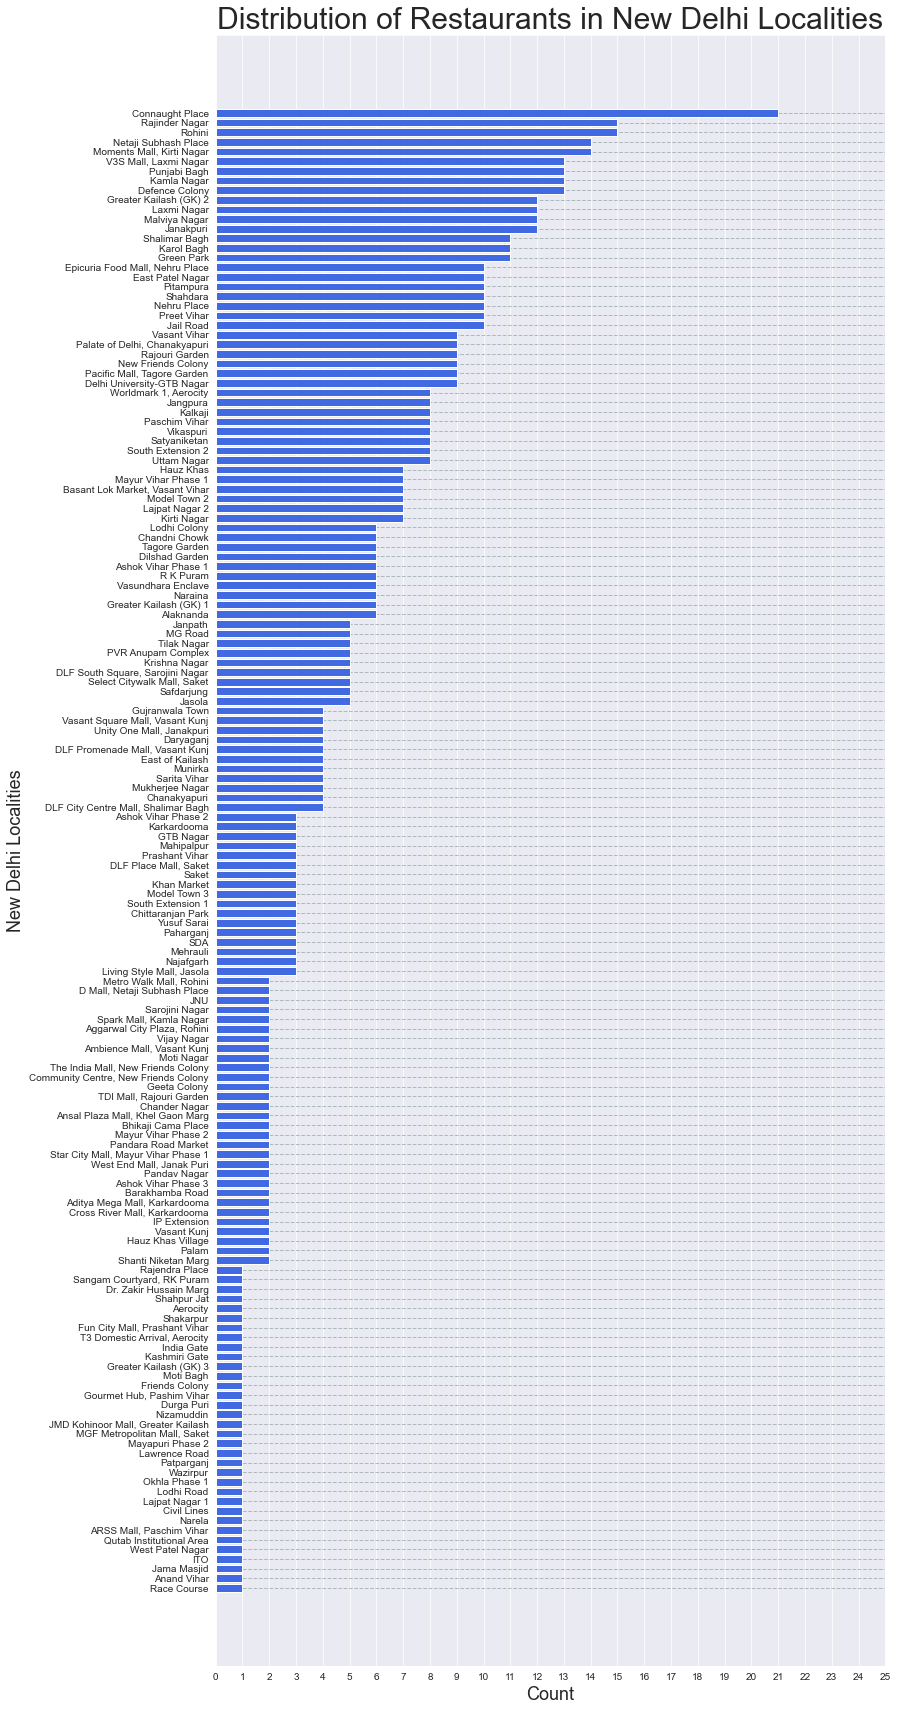

In [42]:
plt.figure(figsize = (12, 30))
plt.barh(delhi_data['Locality'].value_counts().sort_values().index, delhi_data['Locality'].value_counts().sort_values(), color = 'royalblue')
plt.ylabel('New Delhi Localities', fontsize = 18)
plt.xlabel('Count', fontsize = 18)
plt.title('Distribution of Restaurants in New Delhi Localities', fontsize = 30)
plt.xticks(np.arange(0,26,1))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

1. Posh areas have more number of outlets.
2. South Delhi Areas have more number of outlets as compared to other parts of Delhi.

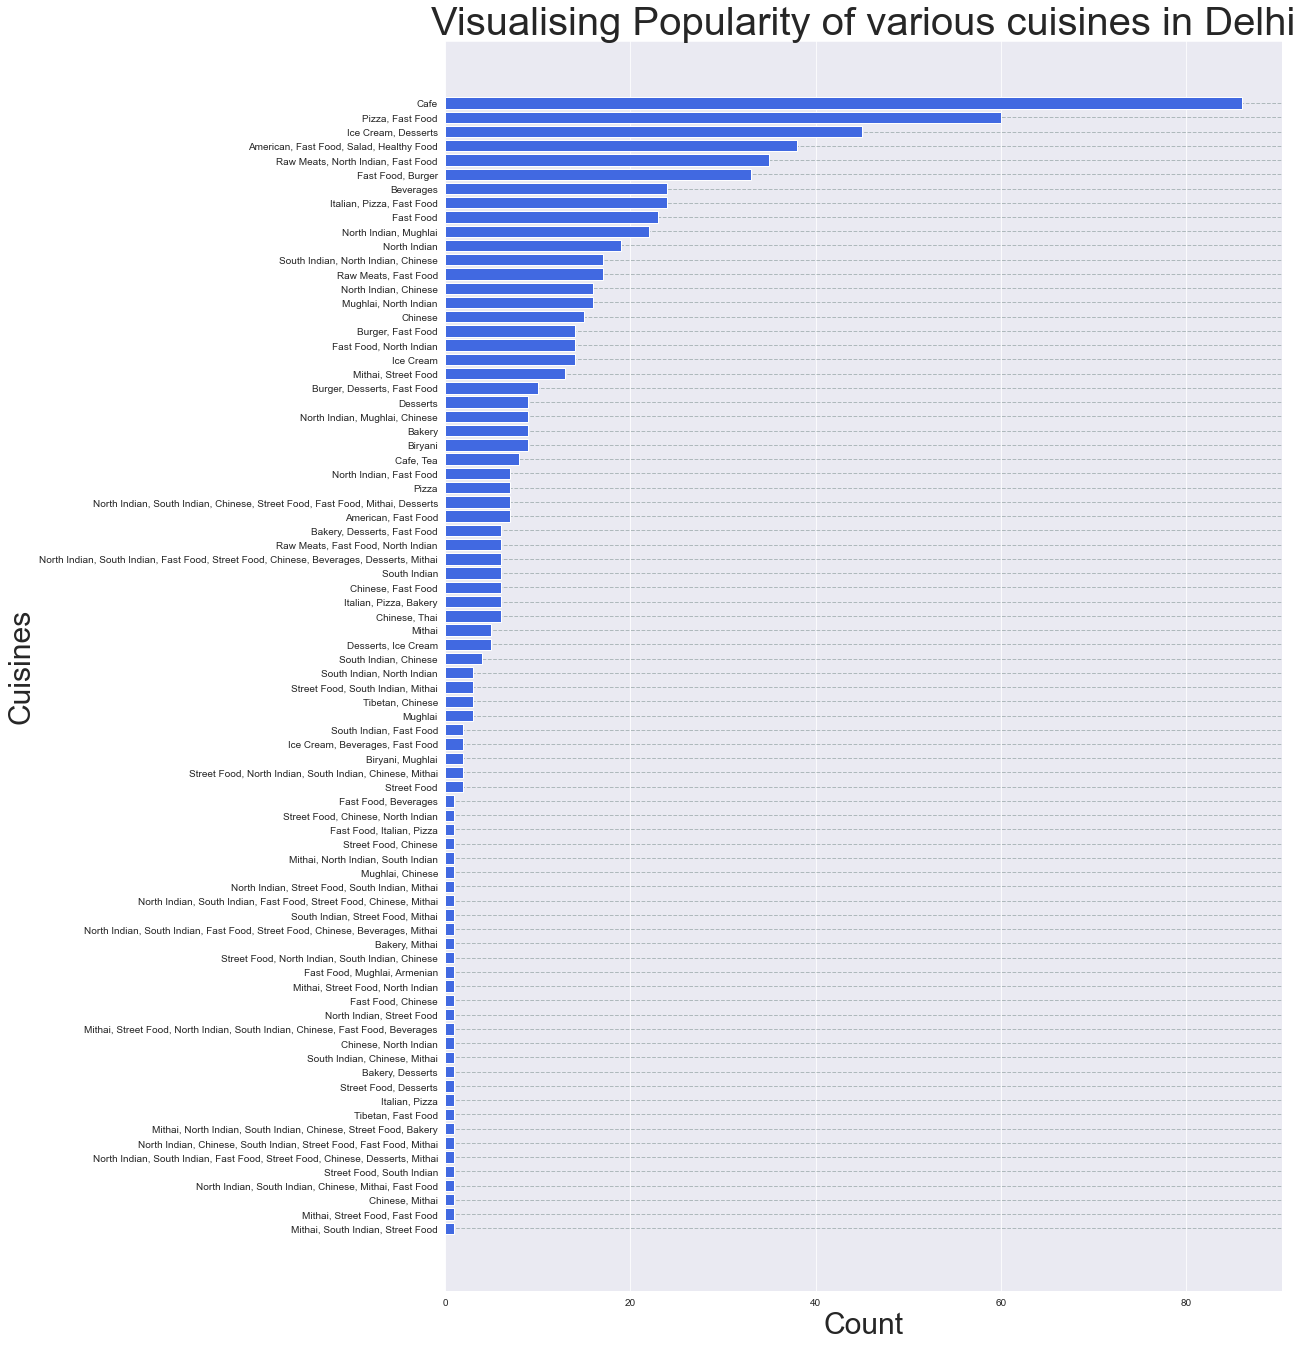

In [43]:
plt.figure(figsize=(15,23))
plt.barh(delhi_data['Cuisines'].value_counts().sort_values().index, delhi_data['Cuisines'].value_counts().sort_values(), color = 'royalblue')
plt.ylabel("Cuisines", fontsize = 30)
plt.xlabel("Count", fontsize = 30)
plt.title('Visualising Popularity of various cuisines in Delhi', fontsize = 40)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

Fast Food is the most trending cuisine

In [44]:
# Creating competitor data 
competitor = set()
for res,cuisine in zip(delhi_data['Restaurant Name'], delhi_data['Cuisines']):
    if 'Mughlai' in cuisine or 'Fast Food' in cuisine or 'American' in cuisine or 'Pizza' in cuisine or 'Burger' in cuisine or 'Biryani' in cuisine:
        competitor.add(res)
competitor

{'34, Chowringhee Lane',
 'Angels in my Kitchen',
 'Apni Rasoi',
 'Behrouz Biryani',
 'Bikaner Sweets',
 'Bikanervala',
 'Burger King',
 'Burger Point',
 "Chawla's\x8c_",
 'Chicago Pizza',
 'China Town',
 'Chinese Hut',
 'Chowringhee',
 'Dolce Gelato',
 "Domino's Pizza",
 "Dunkin' Donuts",
 'Faasos',
 'Green Chick Chop',
 "Haldiram's",
 'KFC',
 "Karim's",
 'Kebab Xpress',
 'Khan Chacha',
 'Madras Cafe',
 "McDonald's",
 'Moti Mahal Delux',
 'Nazeer Foods',
 'Ovenstory Pizza',
 'Pind Balluchi',
 'Pizza Hut',
 'Pizza Hut Delivery',
 'Punjabi Chaap Corner',
 'Republic of Chicken',
 'RollsKing',
 'Sardar A Pure Meat Shop',
 'Shama Chicken Corner',
 'Slice of Italy',
 'Subway',
 "Tibb's Frankie",
 'Twenty Four Seven',
 'Wah Ji Wah',
 'Wow! Momo'}

In [45]:
competitor_data = pd.DataFrame(None)
for col in competitor:
    d = delhi_data[delhi_data['Restaurant Name'] == col]
    competitor_data = pd.concat((competitor_data, d), axis=0)
competitor_data.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2596,7610,Green Chick Chop,New Delhi,"10 & 11, Narmada Market, Opposite Don Bosco Sc...",Alaknanda,77.246899,28.528109,"Raw Meats, North Indian, Fast Food",350,0,0,0,0,1,3.2,Orange,Average,35
3201,7621,Green Chick Chop,New Delhi,"13-15, Fly Over Market, Defence Colony, New Delhi",Defence Colony,77.238315,28.577371,"Raw Meats, North Indian, Fast Food",350,0,0,0,0,1,2.7,Orange,Average,16
3286,307894,Green Chick Chop,New Delhi,"G-18, Hudson Lane, Delhi University-GTB Nagar,...",Delhi University-GTB Nagar,77.204026,28.694949,"Raw Meats, North Indian, Fast Food",350,0,1,0,0,1,3.1,Orange,Average,72
3536,307506,Green Chick Chop,New Delhi,"29/1, Shop 2, East Patel Nagar, New Delhi",East Patel Nagar,77.174063,28.645808,"Raw Meats, North Indian, Fast Food",350,0,0,0,0,1,3.3,Orange,Average,31
3918,311033,Green Chick Chop,New Delhi,"56, Kalu Sarai, Opposite IIT Gate, Near Azad A...",Hauz Khas,77.202793,28.542347,"Raw Meats, North Indian, Fast Food",350,0,0,0,0,1,3.1,Orange,Average,12


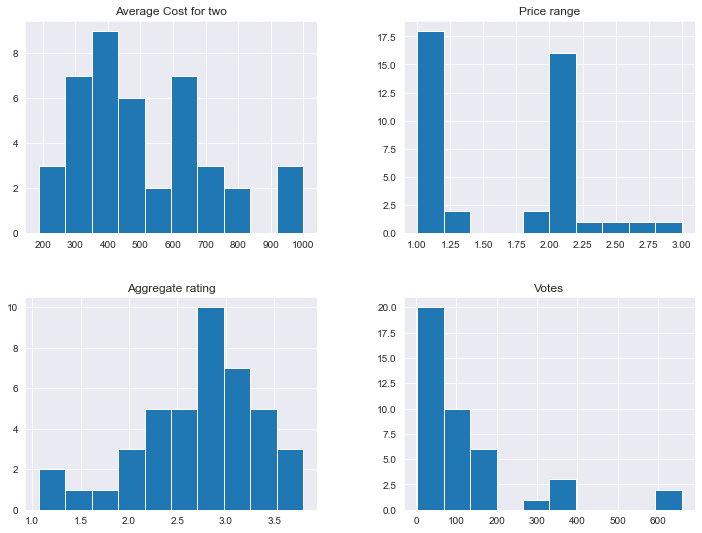

In [46]:
# Group the competitor data by restaurant name and then visualise the mean of average cost
mean_competitor_data = competitor_data.groupby('Restaurant Name').mean()[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]
mean_competitor_data.hist(figsize=(12,9))
plt.show()

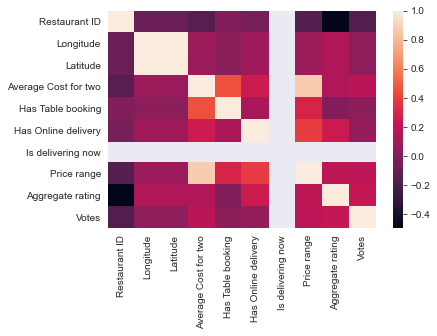

In [49]:
# Let's see if there is any correlation in the competitor data
sns.heatmap(competitor_data.drop('Switch to order menu', axis = 1).corr())
plt.show()

In [64]:
plot_data = [dict(
    type='scattergeo',
    lon = df['Longitude'],
    lat = df['Latitude'],
    text = df['Restaurant Name'],
    mode = 'markers',
    marker = dict(
        cmin = 0,
        color = df['Rating color']
    )
    
)]
fig = go.Figure(data=plot_data)
iplot(fig)